# Data Analysis  - Netflix prize data(Big data Taxonomy)


# Inital File Processing

In [41]:
# Importing the necessary libraries and packages.

# tracking the computation time
from datetime import datetime

# processing files from different location of machine
import os 

# for genrating random number and random splitting
import random 

# for arrays and linear algebra
import numpy as np 

# data manipulation and analysis
import pandas as pd

# importing matplotlib and seaborn plotting graphs for exploratory analysis
import matplotlib.pyplot as plt 
import seaborn as sns

# measuring the objects' memory size
import sys 

# warning package for ignoring any warnings during compilation of any code
import warnings
warnings.filterwarnings("ignore") 

In [42]:
# Looping through all the four text files to consolidate into one and then saving the same in pandas dataframe.

start = datetime.now() # start time of computation
if os.path.isfile('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/pydata.csv'):
    
    #read all txt file and store them in one big file in csv format'pydata.csv'
    data = open('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/pydata.csv', mode='w')
    
    row = list()
    files = ['/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_1.txt'
             ,'/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_2.txt',
             '/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_3.txt',
             '/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_4.txt']
    for file in files:
        print('reading ratings from {}...'.format(file))
        with open(file) as lines:
            for line in lines:
                line = line.strip()
                if line.endswith(':'):
                    #all are rating
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    print('Done.\n')
    data.close()
print('time taken to write the csv file:', datetime.now() - start) # printing the computation time for processing four rating files.

reading ratings from /Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_1.txt...
reading ratings from /Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_2.txt...
reading ratings from /Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_3.txt...
reading ratings from /Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/combined_data_4.txt...
Done.

time taken to write the csv file: 0:01:31.965624


Computation Time Note: OS package processed the file in almost 90 seconds.

In [43]:
#Importing the four text files into Pandas dataframe
rating_data = pd.read_csv('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/pydata.csv', sep=',', names=['movie_id','user_id','rating','date'])

# converting date column in data time format
rating_data.date = pd.to_datetime(rating_data.date)

In [44]:
#Importing the movie_titles csv file into Pandas dataframe
movie_titles = pd.read_csv('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/movie_titles.csv', sep=',', names=['movie_id', 'release_year', 'movie_title',])

# Pre-processing the Data

In [45]:
#Checking Missing values on movie title dataset
movie_titles[pd.isnull(movie_titles).any(axis=1)]

,movie_id,release_year,movie_title
4387,4388,NaN,Ancient Civilizations: Rome and Pompeii
4793,4794,NaN,Ancient Civilizations: Land of the Pharaohs
7240,7241,NaN,Ancient Civilizations: Athens and Greece
10781,10782,NaN,Roti Kapada Aur Makaan
15917,15918,NaN,Hote Hote Pyaar Ho Gaya
16677,16678,NaN,Jimmy Hollywood
17666,17667,NaN,Eros Dance Dhamaka


There are 7 records missing for 'release_year'. Filling the release year manually with the values as available on IMDB.
Source IMDB:
Ancient Civilizations: Rome and Pompeii - 2001 
Ancient Civilizations: Land of the Pharaohs - 2001 
Ancient Civilizations: Athens and Greece - 2001 
Roti Kapada Aur Makaan - 1974
Hote Hote Pyaar Ho Gaya - 1999 
Jimmy Hollywood -1994 
Eros Dance Dhamaka -1999 
Now filling the year column and try to remove all the null values

In [46]:
movie_titles.at[4387,'release_year'] = 2001
movie_titles.at[4793,'release_year'] = 2001
movie_titles.at[7240,'release_year'] = 2001
movie_titles.at[10781,'release_year'] = 1974
movie_titles.at[15917,'release_year'] = 1999
movie_titles.at[16677,'release_year'] = 1994
movie_titles.at[17666,'release_year'] = 1999

In [47]:
# converting release_year(float) to integer
movie_titles['release_year'] = movie_titles['release_year'].astype(int)
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      17770 non-null  int64 
 1   release_year  17770 non-null  int64 
 2   movie_title   17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


Comment:  There are no missing values remaining in the dataset. The movie_titles seems to be a small files of just 17700 movies. It consists of the just three columns 2 being integers(movie_id and release_year) and one object type (movie_titles). Also, the memory usage is just 417 KB.

In [48]:
# Merging the rating dataset(df) and the movie_titles on common unique column move_id.
start = datetime.now()  #start time of computation

netflix_dataset= rating_data.join(movie_titles.set_index('movie_id'), on='movie_id')
print('time taken to obtain the final big file:', datetime.now() - start) # printing the computation time
print("Memory size of netflix combined file is ", sys.getsizeof(netflix_dataset))


time taken to obtain the final big file: 0:00:13.943253
Memory size of netflix combined file is  11427784778


Computation Time and Memory Size: The final combined file took 14 seconds to compute and the memory size is 11.5 GB which is significantly large.

# Understanding the Dataset

In [25]:
netflix_dataset.info() #to know the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   movie_id      int64         
 1   user_id       int64         
 2   rating        int64         
 3   date          datetime64[ns]
 4   release_year  int64         
 5   movie_title   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 4.5+ GB


In [26]:
netflix_dataset.info(memory_usage='deep') #to know the detailed information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   movie_id      int64         
 1   user_id       int64         
 2   rating        int64         
 3   date          datetime64[ns]
 4   release_year  int64         
 5   movie_title   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 10.6 GB


Netflix Dataset facts: There are 100480507 rows and 6 columns. The columns names are movie_id, user_id, rating, date release_year and movie_titles. The date (date format) here is the rating date of a particular movie.

In [27]:
netflix_dataset.head() # to know the head of the dataset

,movie_id,user_id,rating,date,release_year,movie_title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet


In [10]:
netflix_dataset.tail() # to know the tail of the dataset

,movie_id,user_id,rating,date,release_year,movie_title
100480502,17770,1790158,4,2005-11-01,2003,Alien Hunter
100480503,17770,1608708,3,2005-07-19,2003,Alien Hunter
100480504,17770,234275,1,2004-08-07,2003,Alien Hunter
100480505,17770,255278,4,2004-05-28,2003,Alien Hunter
100480506,17770,453585,2,2005-03-10,2003,Alien Hunter


In [11]:
netflix_dataset.describe() # statistical information of the numerical columns

,movie_id,user_id,rating,release_year
count,1.004805e+08,1.004805e+08,1.004805e+08,1.004805e+08
mean,9.070915e+03,1.322489e+06,3.604290e+00,1.993912e+03
std,5.131891e+03,7.645368e+05,1.085219e+00,1.240080e+01
min,1.000000e+00,6.000000e+00,1.000000e+00,1.896000e+03
25%,4.677000e+03,6.611980e+05,3.000000e+00,1.990000e+03
50%,9.051000e+03,1.319012e+06,4.000000e+00,1.998000e+03
75%,1.363500e+04,1.984455e+06,4.000000e+00,2.002000e+03
max,1.777000e+04,2.649429e+06,5.000000e+00,2.005000e+03


# Exploratory Data Analysis

### Visualization

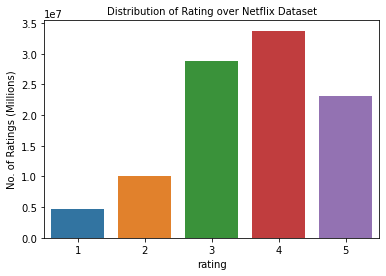

In [20]:
# Distribution of Rating over the dataset
fig, ax = plt.subplots()
plt.title('Distribution of Rating over Netflix Dataset', fontsize=10)
sns.countplot(netflix_dataset.rating)
ax.set_ylabel('No. of Ratings (Millions)')
plt.show()

Analytical Comment: Users generally give rating '4' do the movie and users hardly give a lower rating of 1 and 2. There might be possiblity that the viewers who donot like a movie just avoid viewing that  completely and not prefer to rate them.

Analytical Comment: There is a tremendous growth of Netflix in 2003-2006. There are about 1 million ratings of the movie by the end of 2005 and there is steep fall after 2005.

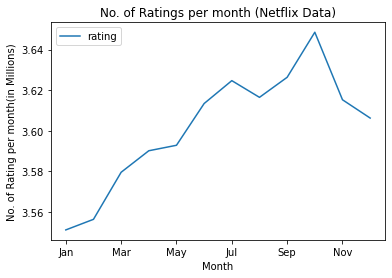

In [49]:
# Six year Monthly analysis of the date column against rating

netflix_dataset["date"] = pd.to_datetime(netflix_dataset["date"])

#month extract
netflix_dataset["month"] = netflix_dataset["date"].dt.month

# creating new dataframe on mean of rating and month 
new_netflix = netflix_dataset.groupby(["month"], as_index=False)["rating"].mean()

#creating month dictionary
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8:"Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

# replacing month with month dictionery
new_netflix.month.replace(month_map,inplace=True)
new_netflix = new_netflix.set_index("month")

# Line plot for the monthly trend
ax = new_netflix.plot()
ax.set_title('No. of Ratings per month (Netflix Data)')
plt.xlabel('Month')
plt.ylabel('No. of Rating per month(in Millions)')
plt.show()

Critical Comment: The viewers frequently rate the movie in the month of the October and the lowest in the month of January. There might be likely hood of people going on holidays and less concentrating on watching movies.

### Comparative analysis with rating column

In [15]:
# movies with the ratings more than 4 or more.
rating_4 = netflix_dataset[netflix_dataset['rating'] >= 4]


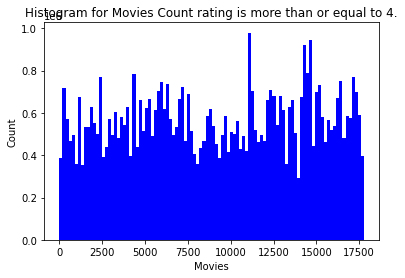

In [22]:
# Distribution of movies with the rating 4 or more.
plt.hist(rating_4['movie_id'], bins=100, color='blue')
plt.xlabel('Movies')
plt.ylabel('Count')
plt.title('Histogram for Movies Count rating is more than or equal to 4.')
plt.show()

In [16]:
rating_4

,movie_id,user_id,rating,date,release_year,movie_title
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
6,1,124105,4,2004-08-05,2003,Dinosaur Planet
8,1,1842128,4,2004-05-09,2003,Dinosaur Planet
...,...,...,...,...,...,...
100480495,17770,1274035,4,2005-06-10,2003,Alien Hunter
100480498,17770,516110,5,2004-08-26,2003,Alien Hunter
100480500,17770,986348,4,2004-08-12,2003,Alien Hunter
100480502,17770,1790158,4,2005-11-01,2003,Alien Hunter


There are 56.9 millions instances where the rating is 4 or 5.

In [28]:
high_rated_movie = round(len(rating_4['movie_id'])/len(netflix_dataset['movie_id'])* 100, 2)

print(f"There are {high_rated_movie}% of the movies which are highly rated")

There are 56.65% of the movies which are highly rated


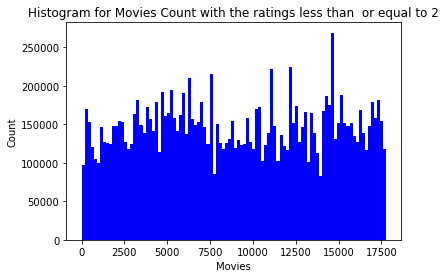

In [23]:
# movies with the ratings 2 or less.
rating_2 = netflix_dataset[netflix_dataset['rating'] <= 2]

# Distribution of movies with the rating 2 or less.
plt.hist(rating_2['movie_id'], bins=100, color='blue')
plt.xlabel('Movies')
plt.ylabel('Count')
plt.title('Histogram for Movies Count with the ratings less than  or equal to 2')
plt.show()

In [37]:
rating_2  # instances of the dataframe where rating of the movie is either 2 or less.

,movie_id,user_id,rating,date,release_year,movie_title
36,1,525356,2,2004-07-11,2003.0,Dinosaur Planet
39,1,2421815,2,2004-02-26,2003.0,Dinosaur Planet
40,1,1009622,1,2005-01-19,2003.0,Dinosaur Planet
41,1,1481961,2,2005-05-24,2003.0,Dinosaur Planet
50,1,1578279,1,2005-05-19,2003.0,Dinosaur Planet
...,...,...,...,...,...,...
100480489,17770,111084,2,2003-11-24,2003.0,Alien Hunter
100480493,17770,1983962,2,2005-02-23,2003.0,Alien Hunter
100480497,17770,834323,2,2005-10-04,2003.0,Alien Hunter
100480504,17770,234275,1,2004-08-07,2003.0,Alien Hunter


There are 14 millions instances where the rating is 1 or 2.

In [26]:
# percentage of the movies which are rated 2 or less
low_rated_percentage = round(len(rating_2['movie_id'])/len(netflix_dataset['movie_id'])* 100, 2)
print(f"There are {low_rated_percentage}% of the movies which are low rated")

There are 14.68% of the movies which are low rated


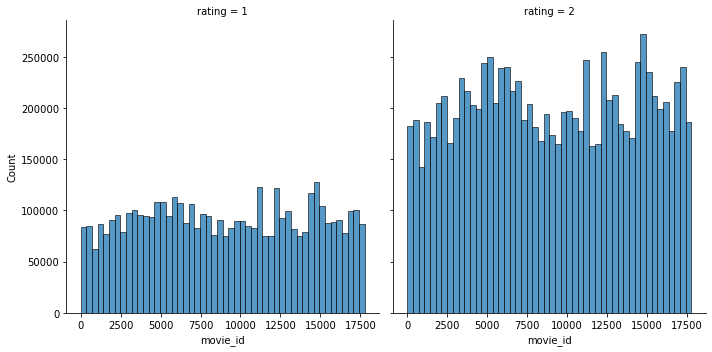

In [30]:
#comparing the histograms for the count of movies for ratings 1 and 2

sns.displot(data=rating_2, x='movie_id', bins=50, col= 'rating')
plt.show()

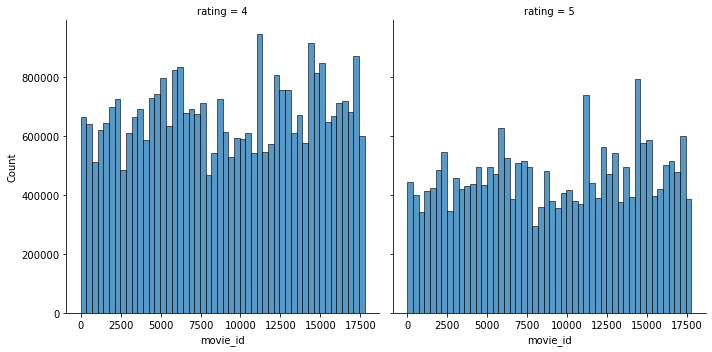

In [32]:
#comparing the histograms for the count of movies for ratings 4 and 5

sns.displot(data=rating_4, x='movie_id', bins=50, col= 'rating') #comparing two histograms
plt.show()

### Quantitative Analysis of the Dataset

In [34]:
print(f"The rating mean is {netflix_dataset['rating'].mean()}")
print(f"Thd rating median is {netflix_dataset['rating'].median()}") 
print(f"Thd standard deviation of the rating is {netflix_dataset['rating'].std()}")

print(f"Thd rating mode is {netflix_dataset.mode()['rating'][0]}")


The rating mean is 3.604289964420661
Thd rating median is 4.0
Thd standard deviation of the rating is 1.0852185655857152
Thd rating mode is 4


Using unique function for exploring some information about the dataset.

In [13]:
print(f"Total number of  unique Ratings are {netflix_dataset['rating'].unique()}")
print(f"Total number of unique Users are {len(netflix_dataset['user_id'].unique())}")
print(f"Total number of unique movies are {len(netflix_dataset['movie_id'].unique())}")
print(f"Total number of unique date are {len(netflix_dataset['date'].unique())}")

Total number of  unique Ratings are [3 5 4 2 1]
Total number of unique Users are 480189
Total number of unique movies are 17770
Total number of unique date are 2182


We want to know how many movies have been viewed by user_id = 2421815

In [12]:
# Most active user in the datset. We will use mode function for that
print(f"Thd most frequent user_id is {netflix_dataset.mode()['user_id'][0]}")


Thd most frequent user_id is 305344


In [20]:
# Obtaining the dataframe with the filter user_id = 305344
netflix_dataset[netflix_dataset['user_id'] == 305344]


,movie_id,user_id,rating,date,release_year,movie_title
327,1,305344,1,2004-02-08,2003.0,Dinosaur Planet
648,2,305344,1,2004-10-16,2004.0,Isle of Man TT 2004 Review
2001,3,305344,2,2003-03-23,1997.0,Character
2793,4,305344,1,2003-12-13,1994.0,Paula Abdul's Get Up & Dance
3570,5,305344,1,2004-12-15,2004.0,The Rise and Fall of ECW
...,...,...,...,...,...,...
100471063,17766,305344,1,2003-05-23,2002.0,Where the Wild Things Are and Other Maurice Se...
100471395,17767,305344,1,2005-01-21,2004.0,Fidel Castro: American Experience
100472385,17768,305344,2,2003-05-18,2000.0,Epoch
100477129,17769,305344,1,2003-10-18,2003.0,The Company


This means that user_id = 305344 has rated 17653 times!

### Probability Analysis of the Rating Column

Analytical Question1: How much is the probablity of rating per movie and plot the subsequent graph

In [ ]:
#frequency of ratings per movie
no_of_ratings_per_movie = netflix_dataset.groupby(by='movie_id')['rating'].count().sort_values(ascending=True)
no_of_ratings_per_movie.describe() 

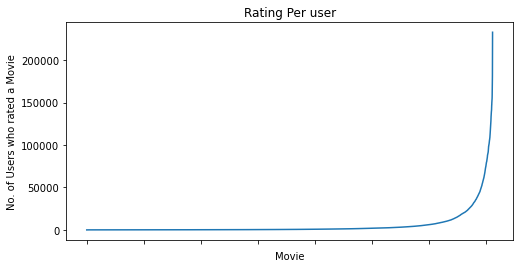

In [42]:

fig = plt.figure(figsize=plt.figaspect(.5)) # customizing the size of the figure
ax = plt.gca() # to get the current figure
plt.plot(no_of_ratings_per_movie.values) 
plt.title('Rating Per user')
plt.xlabel('Movie')
plt.ylabel('No. of Users who rated a Movie')
ax.set_xticklabels([])

plt.show()

Comment: The rating per movie started to drastically increase as the number of users crossed 50,000.

Analytical Question2: How much is the probabilty of the movie rated per user and plot the subsequent graph

In [ ]:
# frequency of rated movie per user
no_of_rated_movie_per_user = netflix_dataset.groupby(by='user_id')['rating'].count().sort_values(ascending=False)
no_of_rated_movie_per_user.describe()

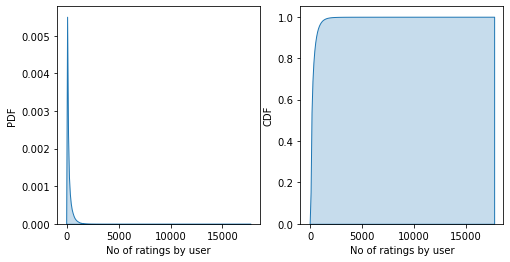

In [45]:
# Plotting the Probability Density Function (PDF) 
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movie_per_user, ax=ax1, shade=True) #using kdeplot from seaborn library
plt.xlabel('No of ratings by user')
plt.ylabel('PDF')


# Cumulative Density function(CDF)
ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movie_per_user, ax=ax2, shade=True, cumulative=True) #using kdeplot from seaborn library
plt.xlabel('No of ratings by user')
plt.ylabel('CDF')

plt.show()

Analytical Comment: The maximum probability of rating a movie by a user is 0.5% and maximum cumulative probability for the same is close to 98%. This means that viewers generally rate almost each and every movie. This analysis doesnot tell truth value if the rating is true for a movie.

In [9]:
min_release_year = min(netflix_dataset.release_year)
max_release_year = max(netflix_dataset.release_year)
print(f"The starting year is {min_release_year} and ending year is {max_release_year} for the release of the movies .")

The starting year is 1896 and ending year is 2005 for the release of the movies .


In [50]:
# Movies relesed per year before 2003 and the movie released per year between 2003 and 2005.

# unique number of movie_ids released 2003 and after.
movies_2003 = len(netflix_dataset[netflix_dataset['release_year'] >=2003]['movie_id'].unique())

# unique number of movie_ids released before 2003
movies_1915 = len(netflix_dataset[netflix_dataset['release_year'] < 2003]['movie_id'].unique())

movies_2003/(netflix_dataset['release_year'].max() - 2003)
movies_1915/ (2003 - netflix_dataset['release_year'].min())

print(f"The number of movies released per year between 2003 and 2005 is {movies_2003/(netflix_dataset['release_year'].max() - 2003)}")
print(f"The number of movies released per year between 1915 and 2003 is {movies_1915/ (2003 - netflix_dataset['release_year'].min())}")


The number of movies released per year between 2003 and 2005 is 1609.5
The number of movies released per year between 1915 and 2003 is 135.99065420560748


### More Pre-processing for Further Exploration

Extracting the year from the date column and create the new rating_year column. Then dropping the 'date' column.


In [12]:
#extracting the year from date column and saving it in a new column 'rating year'
netflix_dataset['rating_year'] = pd.DatetimeIndex(netflix_dataset['date']).year 

# dropping the original date column
netflix_dataset.drop('date', axis=1, inplace=True) 

In [13]:
#The new modified dataset
netflix_dataset.head()

,movie_id,user_id,rating,release_year,movie_title,rating_year
0,1,1488844,3,2003,Dinosaur Planet,2005
1,1,822109,5,2003,Dinosaur Planet,2005
2,1,885013,4,2003,Dinosaur Planet,2005
3,1,30878,4,2003,Dinosaur Planet,2005
4,1,823519,3,2003,Dinosaur Planet,2004


### More Multivariate Data Exploration on new column 'rating year' .

In [73]:
start_rating_year = netflix_dataset['rating_year'].min() # rating started with which year

end_rating_year = netflix_dataset['rating_year'].max() # till which year we have rating data

print(f"Audience started rating in the year {start_rating_year} and rated till {end_rating_year}")

Audience started rating in the year 1999 and rated till 2005


Analytical Question3: Calulate the percentage of the rating count year wise(rating_year wise) and comment on the year with the highest rating. Also, visualize the result on a suitable graph.

In [71]:
#Calculating the percentage of ratings in each and every year.
rating_year_list = netflix_dataset.rating_year.tolist() #converting rating_year to list


length = len(rating_year_list); percentage = [] #declaring empty list
list = list(set(rating_year_list))
list.sort()
for i in list:  # for loop to append the empty list with calculated percentage of rating year divided by its length
    percentage.append(rating_year_list.count(i)/length)
y = 1999
print("Year  Percentage")
for i in range(len(percentage)): # for loop to append the dictionary with year and the rating percentage
    print ('{}: {}'.format(y,percentage[i]*100)) #multiply by 100 to give the result in percentage
    y += 1

Year  Percentage
1999: 0.0021675846042456775
2000: 0.9200222287891123
2001: 1.760571331512091
2002: 4.322102992573475
2003: 9.937586202665159
2004: 30.0621233927492
2005: 52.995426267106716


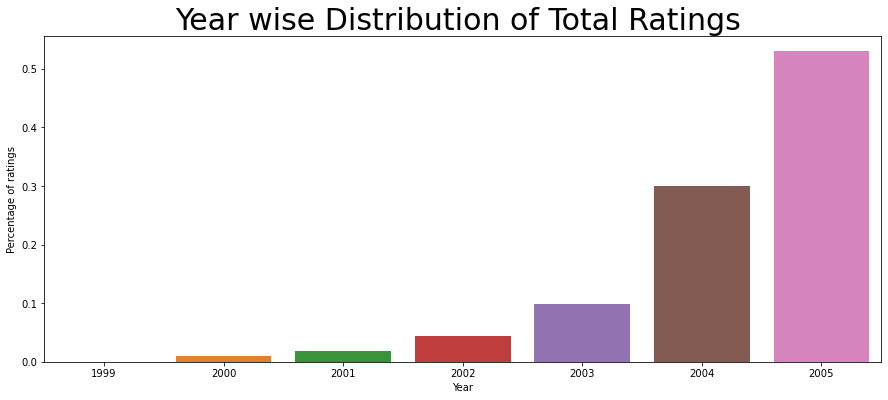

In [72]:
# visualize the percentage output above on the bar graph 
plt.figure(figsize=(15,6)) #cutomizing the figure size
sns.barplot(x=list,y=percentage)
plt.title('Year wise Distribution of Total Ratings ',fontdict={'fontsize':30})
plt.xlabel('Year'); plt.ylabel('Percentage of ratings')
plt.show()

Analytical Comments: The graph shows that viewers started to watch and rate movies more frequently after 2003 and the percentage computation shows that more than over half of the ratings (53%) were done only in 2005.

<AxesSubplot:>

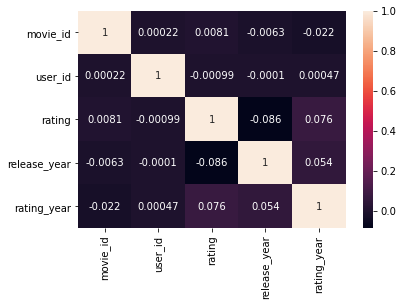

In [23]:
# Correlation shows the realtionship between the numerical columns of the dataset.

correlation = netflix_dataset.corr()
sns.heatmap(correlation, xticklabels=correlation.columns,  #heatmap for visualization for correlation
            yticklabels=correlation.columns, annot=True)

Comments: Generally, the variables are not very much co-related to each other but there is some positive relation between rating_year and rating which make sense because as the netflix became more popular, rating also became more frequent.

# Pre-Processing the dataset suitable for the machine learning model

Removing the movie_titles column as we have movie_id which represent the same as movie_title.
Also, this will help to feed the modified data for the implementing machine learning algorithm.
Here, I am going to use classification model. I have assumed that rating 1, 2 and 3 are 'Low' rated movie and the rating 4 and 5 are 'high' rated movie. 
My objective is to train the model on the basis of this assumption and predict the same for test data. I have created a new column 'rating classifer' as our new dependent variable. Also, I have dropped the original 'rating' column.

In [19]:
# dropping movie titles as movie_id represents the same
netflix_dataset.drop('movie_title', axis=1, inplace=True)

# creating a new column as rating_classify where rating 1, 2 and 3 is categorized as 'Low' rating and 4 and as 'High' rating.
netflix_dataset['rating_classify'] = np.where(netflix_dataset['rating'] > 3, 'High', 'Low')



In [20]:
# Dropping the rows where rating_year is 2005 to make the dataset computable in less time.
netflix_dataset = netflix_dataset.drop(netflix_dataset[netflix_dataset.rating_year == 2005].index)


In [22]:
#Lets check the head of our new dataset ready to feed in machine learning alogorithm
netflix_dataset.head()

,movie_id,user_id,rating,release_year,rating_year,rating_classify
4,1,823519,3,2003,2004,Low
6,1,124105,4,2003,2004,High
7,1,1248029,3,2003,2004,Low
8,1,1842128,4,2003,2004,High
12,1,2590061,3,2003,2004,Low


In [21]:
#Lets check the info of our new dataframe(machine learning ready!)
netflix_dataset.head()
netflix_dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47230434 entries, 4 to 100480505
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   movie_id         int64 
 1   user_id          int64 
 2   rating           int64 
 3   release_year     int64 
 4   rating_year      int64 
 5   rating_classify  object
dtypes: int64(5), object(1)
memory usage: 4.8 GB


In [ ]:
# exporting the dataframe to the local machine for the initiating into pySpark (only need to run once)
#netflix_dataset.to_csv('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/netflix_big.csv', index = None, header=True)

# Decision Tree Classification Model in pySpark

Initiating pySpark session for implementing Decision Tree Classification model

In [24]:
# set up the environment variables and and pyspark will be imported 
import findspark

# measuring the objects' memory
import sys

# tracking the computation time
from datetime import datetime 

# VectorAssembler is a transformer that combines list of columns in a dataframe into a single vector column. 
from pyspark.ml.feature import VectorAssembler

# StringIndexer provides transformer to convert string labels into numerical values
# VectorIndexer helps index categorical features in datasets of Vectors.
from pyspark.ml.feature import StringIndexer, VectorIndexer

# A Spark Pipeline is specified as a sequence of stages, and each stage is either a Transformer or an Estimator
from pyspark.ml import Pipeline

# ML library for Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier

# evalaution ML library for various prediction model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# The entry point to programming Spark with the Dataset and DataFrame API.
from pyspark.sql import SparkSession

#initilizing findspark.init function to locate the spark installed in the machine
findspark.init('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/spark-3.1.2-bin-hadoop3.2')

In [25]:
start = datetime.now()

spark = SparkSession.builder.appName("PySpark").getOrCreate()
print('time taken to initiate the pySpark:', datetime.now() - start)
spark

time taken to initiate the pySpark: 0:00:00.336197


In [26]:
start = datetime.now() # track the computation time 

# importing the new netflix csv file into pyspark dataframe
netflix = spark.read.csv('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/netflix_big.csv', sep=",", header=True, inferSchema=True)
print('time taken to create pySpark data frame:', datetime.now() - start)


time taken to create pySpark data frame: 0:00:15.347592


Computation time for the pyspark dataframe : 21.3 seconds

In [5]:
netflix.printSchema() # to print the various pyspark column names with their datatypes.
netflix.summary().show() # to show the inital glimpse of the dataset

root
 |-- movie_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- movie_title: string (nullable = true)
 |-- rating_year: integer (nullable = true)
 |-- rating_classify: string (nullable = true)

+-------+-----------------+------------------+------------------+----------+------------------+--------------------+------------------+---------------+
|summary|         movie_id|           user_id|            rating|      date|      release_year|         movie_title|       rating_year|rating_classify|
+-------+-----------------+------------------+------------------+----------+------------------+--------------------+------------------+---------------+
|  count|         47230434|          47230434|          47230434|  47230434|          47230434|            47230434|          47230434|       47230434|
|   mean| 9026.21701517712|1319882.1698364236|3.523

In [27]:
# pyspark code to know the size of the pyspark dtaframe in bytes
spark._jsparkSession.sessionState().executePlan(netflix._jdf.queryExecution().logical()).optimizedPlan().stats().sizeInBytes()


1393771233

The Pyspark dataframe for decision tree occupies 1.39 GB of memory to be fed in decision tree classifier

In [29]:
#split the data set into 80% training set and 20% test set.
start = datetime.now()

[trainingData, testData] = netflix.randomSplit([0.8, 0.2])
print('time taken to split the dataframe is:' ,datetime.now() - start)

time taken to split the dataframe is: 0:00:00.046781


In [30]:
#create a vector assembler to transform feature columns into vectors. Rating column will not be included here.
assembler = VectorAssembler(
    inputCols = ["movie_id", "user_id", "release_year", "rating_year"],
    outputCol = "features"
)


In [31]:
# The VectorIndexer will transform categorical attributes to numerical values.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=20)

# create string indexers that transform string label type into numerical value.
# the dataset has only one column which is string datatype which is 'rating_classify, and others are all numerical 
# variables
ratingIndexer = StringIndexer(inputCol="rating_classify", outputCol="label")

In [32]:
#create an estimator based using decision tree
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

In [33]:
#create an ML pipeline in sequence of assembler, indexer, logistic regression
pipeline = Pipeline(stages=[ratingIndexer, assembler, dt])

In [35]:
# start computation time
start = datetime.now() 

# creating the model after ML pipelins is established
model = pipeline.fit(trainingData) 

#test the classification model and make prediction on the test data
prediction = model.transform(testData)  

# computation time after code execution
print('time taken to create the decision tree model is:' ,datetime.now() - start) 

time taken to create the decision tree model is: 0:05:09.024245


In [39]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print(f"Test Error: {(1.0 - accuracy)*100}%")
print(f"Accuracy of the Decision Tree Classification Model is: {accuracy *100}%")

Test Error: 44.3061126484053%
Accuracy of the Decision Tree Classification Model is: 55.6938873515947%


In [12]:
#only show those results with rating = 'High'
prediction.select('rating_classify','label', 'probability','prediction').filter("rating_classify == 'High'").show(n=1000, truncate=False)

+---------------+-----+----------------------------------------+----------+
|rating_classify|label|probability                             |prediction|
+---------------+-----+----------------------------------------+----------+
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High           |0.0  |[0.577078016423587,0.4229219835764129]  |0.0       |
|High       

In [40]:
#stop and shutdown the spark session
spark.stop()

# K-Means Clustering Classification Model in pySpark

In [1]:
# set up the environment variables and and pyspark will be imported 
import findspark

# tracking the computation time
from datetime import datetime 

# VectorAssembler is a transformer that combines list of columns in a dataframe into a single vector column. 
from pyspark.ml.feature import VectorAssembler

# StringIndexer provides transformer to convert string labels into numerical values
from pyspark.ml.feature import StringIndexer

# A Spark Pipeline is specified as a sequence of stages, and each stage is either a Transformer or an Estimator
from pyspark.ml import Pipeline

#importing ML library for k-means model
from pyspark.ml.clustering import KMeans

from pyspark.ml.evaluation import ClusteringEvaluator

# evalaution ML library for various prediction model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Double data type, representing double precision floats.
from pyspark.sql.types import DoubleType

# The entry point to programming Spark with the Dataset and DataFrame API.
from pyspark.sql import SparkSession


#initilizing findspark.init function to locate the spark installed in the machine
findspark.init('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/spark-3.1.2-bin-hadoop3.2')

In [2]:
spark = SparkSession.builder.appName("SparkLab").getOrCreate()#create the Spark Session
spark

In [3]:
start = datetime.now()
netflix = spark.read.csv('/Users/neha/Desktop/Studies Msc Data Analytics/Big Data/Netflix Big Data set/netflix_small.csv', sep=",", header=True, inferSchema=True)
print('time taken to create pySpark data frame:', datetime.now() - start)

time taken to create pySpark data frame: 0:00:10.421451


In [7]:
# pyspark code to know the size of the pyspark dtaframe in bytes
spark._jsparkSession.sessionState().executePlan(netflix._jdf.queryExecution().logical()).optimizedPlan().stats().sizeInBytes()


501679042

we are going to feed K-means algorithm with 501.6 MB

In [12]:
#split the data set into training and test, e.g. 60% for training, 40% for testing
start = datetime.now()

[trainingData, testData] = netflix.randomSplit([0.6, 0.4])
print('time taken to split the dataframe is:' ,datetime.now() - start)

time taken to split the dataframe is: 0:00:00.082676


In [13]:
#create a vector assembler to transform feature columns into vectors
assembler = VectorAssembler(
    inputCols = ["movie_id", "user_id", "release_year", "rating_year"],
    outputCol = "features"
)
assembler 

VectorAssembler_f385a7f1d9b7

In [14]:
#The VectorIndexer will automatically transform categorical attributes to numerical values

#featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures")#, maxCategories=20)
#create string indexers that transform string label type into numerical value
indexer = StringIndexer(inputCol="rating_classify", outputCol="label")

In [15]:
#create a k-means clustering
kmeans = KMeans().setK(2).setSeed(1)

#create an ML pipeline in sequence of assembler -> indexer -> logistic regression
pipeline = Pipeline(stages=[assembler, indexer, kmeans])

In [16]:
start = datetime.now()
#train a logistic regression model using the pipeline and the training data
model = pipeline.fit(trainingData)
print('time taken to create the K-means model is:' ,datetime.now() - start)

time taken to create the K-means model is: 0:02:04.199960


In [17]:
#test the classification model using the test data
prediction = model.transform(testData)
prediction.show()

+--------+-------+------+------------+-----------+---------------+--------------------+-----+----------+
|movie_id|user_id|rating|release_year|rating_year|rating_classify|            features|label|prediction|
+--------+-------+------+------------+-----------+---------------+--------------------+-----+----------+
|       3|   4783|     4|        1997|       2003|           High|[3.0,4783.0,1997....|  1.0|         0|
|       3|   6384|     3|        1997|       2003|            Low|[3.0,6384.0,1997....|  0.0|         0|
|       3|   6689|     4|        1997|       2003|           High|[3.0,6689.0,1997....|  1.0|         0|
|       3|  10996|     2|        1997|       2003|            Low|[3.0,10996.0,1997...|  0.0|         0|
|       3|  21777|     3|        1997|       2003|            Low|[3.0,21777.0,1997...|  0.0|         0|
|       3|  21983|     4|        1997|       2003|           High|[3.0,21983.0,1997...|  1.0|         0|
|       3|  41947|     3|        1997|       2003|     

In [22]:
# computing accuracy 
evaluator = MulticlassClassificationEvaluator(
    labelCol = 'label', predictionCol = 'prediction', metricName='accuracy'
)

p = prediction.withColumn("prediction", prediction["prediction"].cast("double"))

accuracy = evaluator.evaluate(p)

print(f"Classification Error is {(1.0 - accuracy)*100}")
print(f"Accuracy of the K-means model is {accuracy *100 }")

Classification Error is 49.99810630026562
Accuracy of the K-means model is 50.00189369973438


In [23]:
# stop and shutdown the spark session
spark.stop()